In [21]:
#GBP-INR

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time
from pandas import read_csv

In [23]:
input_file="gbp-inr-5-nh.csv"

In [24]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
np.random.seed(5)

In [26]:
df=read_csv(input_file,header=None,index_col=None,delimiter=',')

In [27]:
all_y = df[1].values
dataset=all_y.reshape(-1, 1)

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [29]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [30]:
look_back = 80
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [31]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [32]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=80, verbose=1)

Epoch 1/1000
616/616 [==============================] - 2s 3ms/step - loss: 0.2463
Epoch 2/1000
616/616 [==============================] - 0s 157us/step - loss: 0.0251
Epoch 3/1000
616/616 [==============================] - 0s 142us/step - loss: 0.0339
Epoch 4/1000
616/616 [==============================] - 0s 171us/step - loss: 0.0220
Epoch 5/1000
616/616 [==============================] - 0s 155us/step - loss: 0.0135
Epoch 6/1000
616/616 [==============================] - 0s 120us/step - loss: 0.0158
Epoch 7/1000
616/616 [==============================] - 0s 148us/step - loss: 0.0123
Epoch 8/1000
616/616 [==============================] - 0s 158us/step - loss: 0.0107
Epoch 9/1000
616/616 [==============================] - 0s 194us/step - loss: 0.0100
Epoch 10/1000
616/616 [==============================] - 0s 155us/step - loss: 0.0112
Epoch 11/1000
616/616 [==============================] - 0s 199us/step - loss: 0.0095
Epoch 12/1000
616/616 [==============================] - 0s 145us

616/616 [==============================] - 0s 63us/step - loss: 0.0016
Epoch 98/1000
616/616 [==============================] - 0s 69us/step - loss: 0.0016
Epoch 99/1000
616/616 [==============================] - 0s 55us/step - loss: 0.0018
Epoch 100/1000
616/616 [==============================] - 0s 54us/step - loss: 0.0019
Epoch 101/1000
616/616 [==============================] - 0s 53us/step - loss: 0.0019
Epoch 102/1000
616/616 [==============================] - 0s 53us/step - loss: 0.0018
Epoch 103/1000
616/616 [==============================] - 0s 67us/step - loss: 0.0018
Epoch 104/1000
616/616 [==============================] - 0s 67us/step - loss: 0.0018
Epoch 105/1000
616/616 [==============================] - 0s 60us/step - loss: 0.0016
Epoch 106/1000
616/616 [==============================] - 0s 66us/step - loss: 0.0017
Epoch 107/1000
616/616 [==============================] - 0s 63us/step - loss: 0.0017
Epoch 108/1000
616/616 [==============================] - 0s 66us/step 

616/616 [==============================] - 0s 69us/step - loss: 0.0012
Epoch 193/1000
616/616 [==============================] - 0s 64us/step - loss: 0.0011
Epoch 194/1000
616/616 [==============================] - 0s 55us/step - loss: 0.0011
Epoch 195/1000
616/616 [==============================] - 0s 56us/step - loss: 0.0012
Epoch 196/1000
616/616 [==============================] - 0s 58us/step - loss: 0.0012
Epoch 197/1000
616/616 [==============================] - 0s 66us/step - loss: 0.0011
Epoch 198/1000
616/616 [==============================] - 0s 70us/step - loss: 0.0011
Epoch 199/1000
616/616 [==============================] - 0s 79us/step - loss: 0.0011
Epoch 200/1000
616/616 [==============================] - 0s 62us/step - loss: 0.0012
Epoch 201/1000
616/616 [==============================] - 0s 61us/step - loss: 0.0011
Epoch 202/1000
616/616 [==============================] - 0s 56us/step - loss: 0.0011
Epoch 203/1000
616/616 [==============================] - 0s 56us/ste

616/616 [==============================] - 0s 55us/step - loss: 9.0021e-04
Epoch 287/1000
616/616 [==============================] - 0s 55us/step - loss: 0.0010
Epoch 288/1000
616/616 [==============================] - 0s 69us/step - loss: 9.6206e-04
Epoch 289/1000
616/616 [==============================] - 0s 54us/step - loss: 0.0011
Epoch 290/1000
616/616 [==============================] - 0s 55us/step - loss: 9.9567e-04
Epoch 291/1000
616/616 [==============================] - 0s 84us/step - loss: 8.8488e-04
Epoch 292/1000
616/616 [==============================] - 0s 55us/step - loss: 8.8404e-04
Epoch 293/1000
616/616 [==============================] - 0s 57us/step - loss: 0.0010
Epoch 294/1000
616/616 [==============================] - 0s 58us/step - loss: 0.0011
Epoch 295/1000
616/616 [==============================] - 0s 55us/step - loss: 9.3978e-04
Epoch 296/1000
616/616 [==============================] - 0s 55us/step - loss: 9.7213e-04
Epoch 297/1000
616/616 [=================

616/616 [==============================] - 0s 55us/step - loss: 8.8376e-04
Epoch 378/1000
616/616 [==============================] - 0s 59us/step - loss: 8.0867e-04
Epoch 379/1000
616/616 [==============================] - 0s 59us/step - loss: 9.0495e-04
Epoch 380/1000
616/616 [==============================] - 0s 55us/step - loss: 7.2113e-04
Epoch 381/1000
616/616 [==============================] - 0s 61us/step - loss: 8.0400e-04
Epoch 382/1000
616/616 [==============================] - 0s 62us/step - loss: 7.9510e-04
Epoch 383/1000
616/616 [==============================] - 0s 61us/step - loss: 7.9802e-04
Epoch 384/1000
616/616 [==============================] - 0s 59us/step - loss: 7.9626e-04
Epoch 385/1000
616/616 [==============================] - 0s 57us/step - loss: 8.2892e-04
Epoch 386/1000
616/616 [==============================] - 0s 63us/step - loss: 8.3305e-04
Epoch 387/1000
616/616 [==============================] - 0s 65us/step - loss: 7.9825e-04
Epoch 388/1000
616/616 [=

616/616 [==============================] - 0s 63us/step - loss: 6.7238e-04
Epoch 469/1000
616/616 [==============================] - 0s 62us/step - loss: 7.3943e-04
Epoch 470/1000
616/616 [==============================] - 0s 55us/step - loss: 7.5174e-04
Epoch 471/1000
616/616 [==============================] - 0s 55us/step - loss: 6.2950e-04
Epoch 472/1000
616/616 [==============================] - 0s 56us/step - loss: 6.5124e-04
Epoch 473/1000
616/616 [==============================] - 0s 62us/step - loss: 7.1708e-04
Epoch 474/1000
616/616 [==============================] - 0s 62us/step - loss: 7.3078e-04
Epoch 475/1000
616/616 [==============================] - 0s 94us/step - loss: 7.5959e-04
Epoch 476/1000
616/616 [==============================] - 0s 55us/step - loss: 7.0098e-04
Epoch 477/1000
616/616 [==============================] - 0s 55us/step - loss: 7.4054e-04
Epoch 478/1000
616/616 [==============================] - 0s 59us/step - loss: 6.3317e-04
Epoch 479/1000
616/616 [=

Epoch 559/1000
616/616 [==============================] - 0s 55us/step - loss: 7.5022e-04
Epoch 560/1000
616/616 [==============================] - 0s 94us/step - loss: 6.1248e-04
Epoch 561/1000
616/616 [==============================] - 0s 60us/step - loss: 6.7768e-04
Epoch 562/1000
616/616 [==============================] - 0s 61us/step - loss: 6.3695e-04
Epoch 563/1000
616/616 [==============================] - 0s 60us/step - loss: 6.5638e-04
Epoch 564/1000
616/616 [==============================] - 0s 55us/step - loss: 5.9012e-04
Epoch 565/1000
616/616 [==============================] - 0s 78us/step - loss: 5.7657e-04
Epoch 566/1000
616/616 [==============================] - 0s 57us/step - loss: 5.7149e-04
Epoch 567/1000
616/616 [==============================] - 0s 54us/step - loss: 6.0084e-04
Epoch 568/1000
616/616 [==============================] - 0s 54us/step - loss: 5.3063e-04
Epoch 569/1000
616/616 [==============================] - 0s 61us/step - loss: 5.8442e-04
Epoch 570/

616/616 [==============================] - 0s 61us/step - loss: 5.5519e-04
Epoch 651/1000
616/616 [==============================] - 0s 59us/step - loss: 6.8327e-04
Epoch 652/1000
616/616 [==============================] - 0s 63us/step - loss: 5.4701e-04
Epoch 653/1000
616/616 [==============================] - 0s 63us/step - loss: 5.8515e-04
Epoch 654/1000
616/616 [==============================] - 0s 71us/step - loss: 5.1115e-04
Epoch 655/1000
616/616 [==============================] - 0s 79us/step - loss: 5.4872e-04
Epoch 656/1000
616/616 [==============================] - 0s 64us/step - loss: 5.0285e-04
Epoch 657/1000
616/616 [==============================] - 0s 68us/step - loss: 5.4530e-04
Epoch 658/1000
616/616 [==============================] - 0s 70us/step - loss: 5.1530e-04
Epoch 659/1000
616/616 [==============================] - 0s 68us/step - loss: 5.2508e-04
Epoch 660/1000
616/616 [==============================] - 0s 63us/step - loss: 4.9677e-04
Epoch 661/1000
616/616 [=

616/616 [==============================] - 0s 171us/step - loss: 5.2719e-04
Epoch 741/1000
616/616 [==============================] - 0s 194us/step - loss: 5.6686e-04
Epoch 742/1000
616/616 [==============================] - 0s 182us/step - loss: 5.3734e-04
Epoch 743/1000
616/616 [==============================] - 0s 185us/step - loss: 4.5877e-04
Epoch 744/1000
616/616 [==============================] - 0s 190us/step - loss: 4.7400e-04
Epoch 745/1000
616/616 [==============================] - 0s 185us/step - loss: 5.2036e-04
Epoch 746/1000
616/616 [==============================] - 0s 207us/step - loss: 4.7792e-04
Epoch 747/1000
616/616 [==============================] - 0s 181us/step - loss: 4.7033e-04
Epoch 748/1000
616/616 [==============================] - 0s 190us/step - loss: 6.1413e-04
Epoch 749/1000
616/616 [==============================] - 0s 200us/step - loss: 5.5867e-04
Epoch 750/1000
616/616 [==============================] - 0s 181us/step - loss: 5.0468e-04
Epoch 751/1000

616/616 [==============================] - 0s 297us/step - loss: 4.4814e-04
Epoch 831/1000
616/616 [==============================] - 0s 226us/step - loss: 4.9004e-04
Epoch 832/1000
616/616 [==============================] - 0s 211us/step - loss: 4.3992e-04
Epoch 833/1000
616/616 [==============================] - 0s 235us/step - loss: 4.5439e-04
Epoch 834/1000
616/616 [==============================] - 0s 214us/step - loss: 4.8384e-04
Epoch 835/1000
616/616 [==============================] - 0s 193us/step - loss: 4.6784e-04
Epoch 836/1000
616/616 [==============================] - 0s 194us/step - loss: 4.9689e-04
Epoch 837/1000
616/616 [==============================] - 0s 190us/step - loss: 4.7303e-04
Epoch 838/1000
616/616 [==============================] - 0s 176us/step - loss: 4.6923e-04
Epoch 839/1000
616/616 [==============================] - 0s 174us/step - loss: 4.8614e-04
Epoch 840/1000
616/616 [==============================] - 0s 176us/step - loss: 5.0937e-04
Epoch 841/1000

616/616 [==============================] - 0s 275us/step - loss: 4.8267e-04
Epoch 921/1000
616/616 [==============================] - 0s 176us/step - loss: 4.3765e-04
Epoch 922/1000
616/616 [==============================] - 0s 179us/step - loss: 4.3872e-04
Epoch 923/1000
616/616 [==============================] - 0s 179us/step - loss: 4.4607e-04
Epoch 924/1000
616/616 [==============================] - 0s 195us/step - loss: 4.4770e-04
Epoch 925/1000
616/616 [==============================] - 0s 215us/step - loss: 4.6355e-04
Epoch 926/1000
616/616 [==============================] - 0s 208us/step - loss: 5.1368e-04
Epoch 927/1000
616/616 [==============================] - 0s 176us/step - loss: 4.5149e-04
Epoch 928/1000
616/616 [==============================] - 0s 172us/step - loss: 4.8080e-04
Epoch 929/1000
616/616 [==============================] - 0s 185us/step - loss: 4.4470e-04
Epoch 930/1000
616/616 [==============================] - 0s 191us/step - loss: 3.9949e-04
Epoch 931/1000

In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [34]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [35]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.46 RMSE
Test Score: 1.40 RMSE


In [36]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [37]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


testPrices:


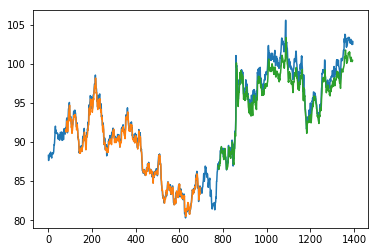

In [38]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
plt.plot(testPredictPlot)
plt.show()

In [39]:
print('testPredictions:')
print(testPredict)

testPredictions:
[[ 86.987434]
 [ 86.74626 ]
 [ 86.606964]
 [ 86.51028 ]
 [ 86.49464 ]
 [ 86.977104]
 [ 87.07251 ]
 [ 86.90278 ]
 [ 87.22106 ]
 [ 87.410736]
 [ 87.2889  ]
 [ 88.288635]
 [ 88.62952 ]
 [ 88.777275]
 [ 89.322395]
 [ 89.410126]
 [ 89.34258 ]
 [ 89.14689 ]
 [ 88.597084]
 [ 88.73352 ]
 [ 88.83854 ]
 [ 88.65182 ]
 [ 88.72887 ]
 [ 88.794075]
 [ 88.86757 ]
 [ 88.037476]
 [ 87.75349 ]
 [ 87.90981 ]
 [ 88.18613 ]
 [ 88.616875]
 [ 88.80391 ]
 [ 89.1747  ]
 [ 88.920456]
 [ 88.51218 ]
 [ 88.1467  ]
 [ 87.927986]
 [ 87.66505 ]
 [ 87.272804]
 [ 86.996086]
 [ 86.47199 ]
 [ 86.54925 ]
 [ 86.8745  ]
 [ 86.63104 ]
 [ 86.76045 ]
 [ 86.81693 ]
 [ 87.05583 ]
 [ 87.52241 ]
 [ 87.91896 ]
 [ 88.97394 ]
 [ 89.37982 ]
 [ 89.012245]
 [ 88.48424 ]
 [ 88.448784]
 [ 88.81364 ]
 [ 88.257706]
 [ 88.143265]
 [ 88.25524 ]
 [ 88.06439 ]
 [ 87.911446]
 [ 88.74047 ]
 [ 88.754845]
 [ 88.45662 ]
 [ 88.59266 ]
 [ 88.99032 ]
 [ 88.89236 ]
 [ 90.003456]
 [ 89.96378 ]
 [ 89.57336 ]
 [ 89.12658 ]
 [ 87.50935 ]
 [ 